In [1]:
from IPython.display import HTML
import random

import numpy as np

from data import rauw_fault_surface_trace
from rupture import kinematic_rupture_calculator_logic_tree

In [2]:
krclt = kinematic_rupture_calculator_logic_tree()
print(len(krclt))

512


In [3]:
## scenario
trace = rauw_fault_surface_trace(proj=3812) ## ETRS89 / Belgian Lambert 2008=)
print(trace.length)
fault_data = {'trace': trace, 'dip': 60}

magnitude = 6.5
rake = -80

55180.99137310802


In [4]:
sub = {'fgc_n': '4'}
#sub = None

krc, leaf = krclt(sub)

In [5]:
fault = krc._fgc(fault_data)

In [6]:
segment = krc._fsc(fault, magnitude, rake)

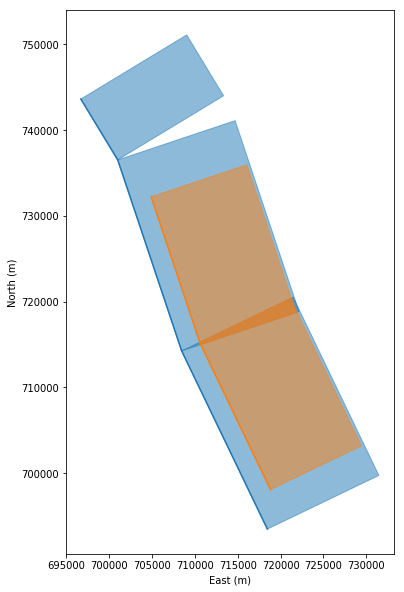

In [7]:
from synthacc.source.faults import plot_faults

plot_faults([fault, segment], size=(15, 10))

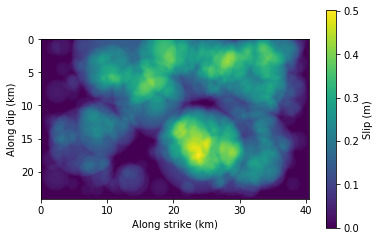

226 4.8679948396382e+18 6.391566739453658


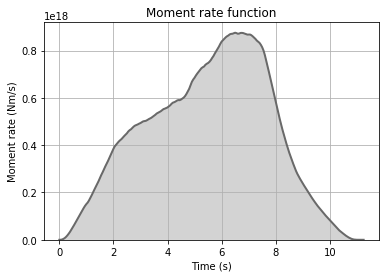

226 4.867994839638203e+18 6.391566739453658


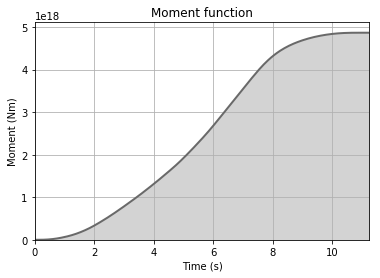

7.000000000000001


In [8]:
r = krc(fault_data, magnitude, rake) ## New rupture

sd = r.slip
sd.plot()

mrf = r.mrf
print(len(mrf), mrf.moment, mrf.magnitude)
mrf.plot()

mf = mrf.get_moment_function()
print(len(mf), mf.moment, mf.magnitude)
mf.plot()

print(mf.get_duration(percentile=5))

<IPython.core.display.Javascript object>


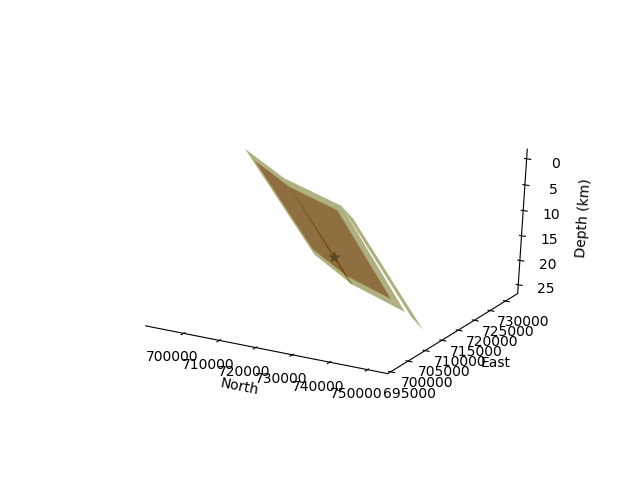

In [9]:
%matplotlib notebook
#%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

for f in fault:
    xs, ys, zs, = np.zeros((2, 2)), np.zeros((2, 2)), np.zeros((2, 2))
    ulc, urc, llc, lrc = f.corners
    
    xs[0,0] = ulc.x
    ys[0,0] = ulc.y
    zs[0,0] = ulc.z
    xs[0,1] = urc.x
    ys[0,1] = urc.y
    zs[0,1] = urc.z
    xs[1,0] = llc.x
    ys[1,0] = llc.y
    zs[1,0] = llc.z
    xs[1,1] = lrc.x
    ys[1,1] = lrc.y
    zs[1,1] = lrc.z

    ax.plot_surface(xs, ys, zs/1000, color='y', alpha=0.5)

    
for f in r.segment:
    xs, ys, zs, = np.zeros((2, 2)), np.zeros((2, 2)), np.zeros((2, 2))
    ulc, urc, llc, lrc = f.corners
    
    xs[0,0] = ulc.x
    ys[0,0] = ulc.y
    zs[0,0] = ulc.z
    xs[0,1] = urc.x
    ys[0,1] = urc.y
    zs[0,1] = urc.z
    xs[1,0] = llc.x
    ys[1,0] = llc.y
    zs[1,0] = llc.z
    xs[1,1] = lrc.x
    ys[1,1] = lrc.y
    zs[1,1] = lrc.z
    ax.plot_surface(xs, ys, zs/1000, color='r', alpha=0.5)

h = r.hypo
ax.scatter3D(h.x, h.y, h.z/1000, marker='*', s=50)

ax.invert_zaxis()

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.grid(False)

## axis labels
ax.set_xlabel('North')
ax.set_ylabel('East')
ax.set_zlabel('Depth (km)')

plt.show()